In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.coordinates import ICRS, Galactic, FK4, FK5

%matplotlib inline

In [2]:
observatories = {'ARO' : EarthLocation(918034.4879*u.m, -4346132.3267*u.m, 4561971.2292*u.m),
                'DRAO' : EarthLocation(lat=49.19*u.deg, lon=-119.37*u.deg, height=545*u.m),
                'GMRT' : EarthLocation(1656988.9135*u.m, 5797576.2281*u.m, 2073756.22*u.m),
                'ARECIBO': EarthLocation(2390486.9000*u.m, -5564731.4400*u.m, 1994720.4500*u.m)
                }


sources = {'b1957+20' : SkyCoord.from_name('PSRB1957+20')}

(<Time object: scale='utc' format='iso' value=2018-02-04 14:15:33.891>, <Time object: scale='utc' format='iso' value=2018-02-04 16:40:10.042>)


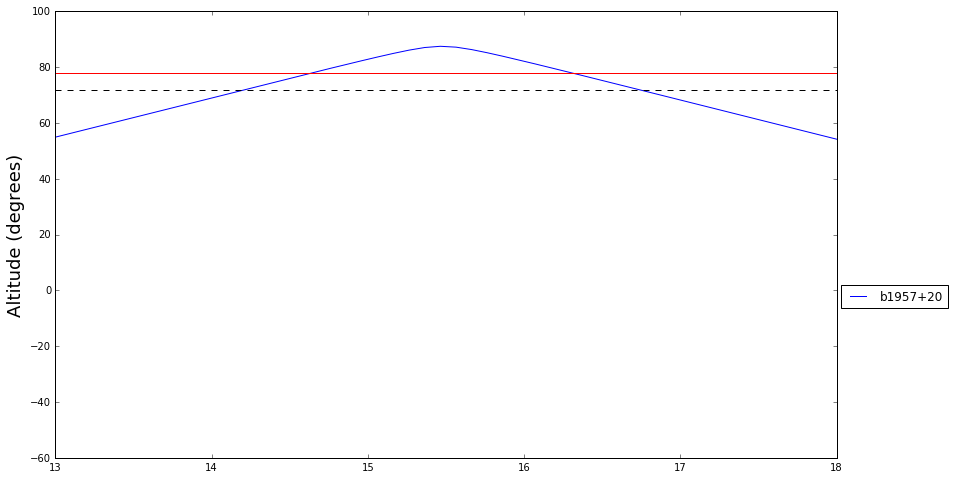

In [38]:
midnight = Time('2018-02-04 00:00:00')
delta_midnight = np.linspace(0, 24, 240)*u.hour

observatory = observatories['ARECIBO']
plt.figure(figsize=(14, 8))

for name, source in sources.iteritems():
    altaz = source.transform_to(AltAz(obstime=midnight+delta_midnight, location=observatory))
    plt.plot(delta_midnight, altaz.alt, label=name)

uptime = (midnight+delta_midnight)[altaz.alt.value > 72]
print(min(uptime), max(uptime))

plt.axhline(72, linestyle='--', color='k')
plt.axhline(78, linestyle='-', color='r')

plt.xlim(13, 18)
plt.legend(bbox_to_anchor=(1.15, 0.4))

plt.ylabel('Altitude (degrees)', fontsize=18)

In [41]:
""" Eclipses, made from propogating ephmeris forward
    Accurate to within 2 seconds, even without applying 
    period derivatives
"""

TASC = 51260.20051988
PB = 0.38196660517441393128
ecl0 = TASC + PB*0.25


# first time to test eclipse against our evn run
# Eclipse at '2014-06-15T06:22:03.145'
t0 = Time('2014-06-13T00:00:00')

#t0 = Time('2018-02-01T00:00:00')
orb0 = int((t0.mjd - TASC) // PB)

ecl_times = []


orbs = orb0 + np.linspace(0,300,300)

ecl_times = Time( ecl0 + orbs*PB, format='mjd')

In [42]:
"""
A bit janky - loop through every day for a few months, find eclipses
within Arecibo's uptime
"""

observatory = observatories['ARECIBO']
# comparing unix times easier and faster than leaving as astropy times
ecl_tu = ecl_times.unix
valid_ecl = []

for i in range(120):

    midnight = t0+i*24.*u.hour
    delta_midnight = np.linspace(0, 24, 240)*u.hour
    for name, source in sources.iteritems():
        altaz = source.transform_to(AltAz(obstime=midnight+delta_midnight, location=observatory))

    uptime = (midnight+delta_midnight)[altaz.alt.value > 78]
    bounds = [min(uptime).unix, max(uptime).unix]
    
    try:
        valid_ecl.append(ecl_times[(ecl_tu > bounds[0]) & (ecl_tu < bounds[1])].isot)
        print(ecl_times[(ecl_tu > bounds[0]) & (ecl_tu < bounds[1])].isot)
    except:
        a = 0


['2014-06-15T06:22:03.145']
['2014-06-20T05:56:22.901']
['2014-06-25T05:30:42.658']
['2014-07-13T05:48:40.240']
['2014-07-18T05:22:59.997']
['2014-07-23T04:57:19.754']
['2014-07-28T04:31:39.511']
['2014-08-02T04:05:59.268']
['2014-08-07T03:40:19.024']
['2014-08-12T03:14:38.781']
['2014-08-17T02:48:58.538']
['2014-08-22T02:23:18.295']
['2014-08-27T01:57:38.051']
['2014-09-01T01:31:57.808']
['2014-09-06T01:06:17.565']
['2014-09-11T00:40:37.322']
['2014-09-15T05:51:12.501' '2014-09-15T15:03:04.790']
['2014-09-16T00:14:57.079' '2014-09-16T09:26:49.368'
 '2014-09-16T18:38:41.657']
['2014-09-17T03:50:33.946' '2014-09-17T13:02:26.235'
 '2014-09-17T22:14:18.524']
['2014-09-18T07:26:10.813' '2014-09-18T16:38:03.101']
['2014-09-19T01:49:55.390' '2014-09-19T11:01:47.679'
 '2014-09-19T20:13:39.968']
['2014-09-20T05:25:32.257' '2014-09-20T14:37:24.546'
 '2014-09-20T23:49:16.835']
['2014-09-21T09:01:09.124' '2014-09-21T18:13:01.413']
['2014-09-22T03:24:53.702' '2014-09-22T12:36:45.991'
 '2014-09-22T

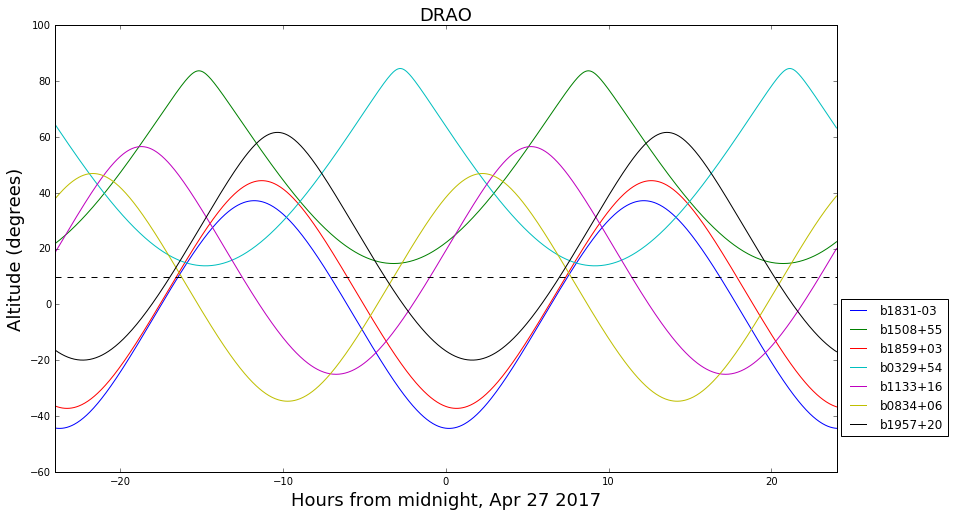

In [8]:
observatory = observatories['DRAO']
plt.figure(figsize=(14, 8))

for name, source in sources.iteritems():
    altaz = source.transform_to(AltAz(obstime=midnight+delta_midnight, location=observatory))
    plt.plot(delta_midnight, altaz.alt, label=name)

plt.axhline(10, linestyle='--', color='k')
plt.xlim(-24, 24)
plt.legend(bbox_to_anchor=(1.15, 0.4))

plt.ylabel('Altitude (degrees)', fontsize=18)
plt.xlabel('Hours from midnight, Apr 27 2017', fontsize=18)
plt.title('DRAO', fontsize=18)

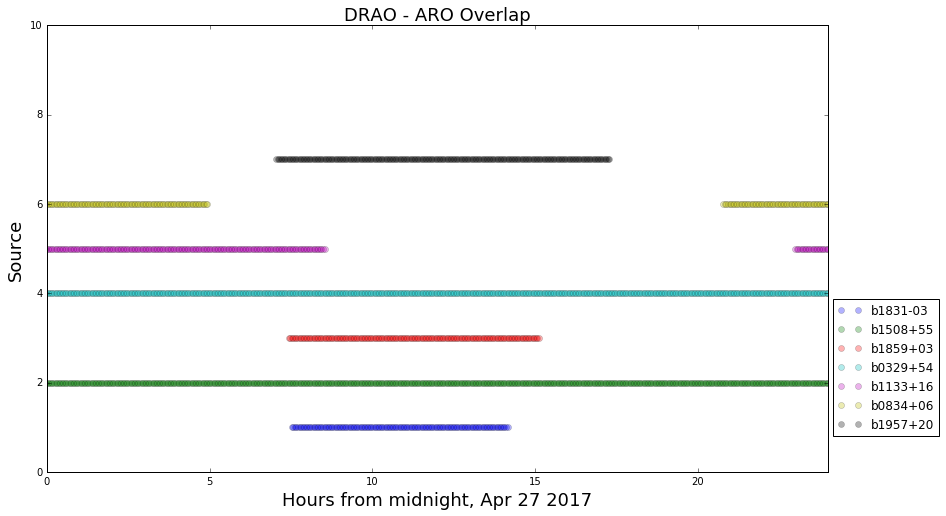

In [7]:
observatory1 = observatories['ARO']
observatory2 = observatories['DRAO']
limit1 = 10.*u.deg
limit2 = 10.*u.deg
plt.figure(figsize=(14, 8))

i = 1

for name, source in sources.iteritems():
    altaz1 = source.transform_to(AltAz(obstime=midnight+delta_midnight, location=observatory1))
    altaz2 = source.transform_to(AltAz(obstime=midnight+delta_midnight, location=observatory2))
    
    al1 = altaz1.alt
    al2 = altaz2.alt

    overlap = np.argwhere( (al1>limit1) & (al2>limit2)).squeeze()
    
    dtoverlap = delta_midnight[overlap]
    
    plt.plot(dtoverlap, np.ones(len(dtoverlap))*i, 'o', label=name, alpha = 0.3)
    
    i += 1
        
plt.xlim(0, 24)
plt.ylim(0,10)
plt.legend(bbox_to_anchor=(1.15, 0.4))

plt.ylabel('Source', fontsize=18)
plt.xlabel('Hours from midnight, Apr 27 2017', fontsize=18)
plt.title('DRAO - ARO Overlap', fontsize=18)